The factorized variational approximation for posterior distribution is given by: $ q(\mu, \tau) = q_{\mu}(\mu)\:q_{\tau}(\tau) $

In [88]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [133]:
# VARIABLES
iterations = 10
samples_number = 100
mu_0 = 0
tau_0 = 1
a_0 = 1
b_0 = 1
a_N = 1
b_N = 1
x_axis = np.arange(-1,1,0.02)
y_axis = np.arange(0,2,0.02)

In [134]:
# SAMPLES GENERATION
vector = np.random.normal(0,1,samples_number)

Calculate $ q_{\mu}(\mu) = \mathcal{N}(\mu|\mu_N, \lambda_N^{-1})$

In [135]:
def compute_qmu(tau_0, mu_0, vector, a_N, b_N):
    
    mu_N = (tau_0 * mu_0 + np.sum(vector)) / (tau_0 + len(vector))
    tau_N = (tau_0 + len(vector)) * (a_N / b_N)
    
    return mu_N, tau_N

Calculate $q_{\tau}(\tau) = Gam(\tau|a_N,b_N)$

In [136]:
def compute_qtau(a_0, b_0, vector, mu_N, mu_0, tau_N):
    
    a_N = a_0 + (len(vector)) / 2
    term1 = (1 / tau_N) + pow(mu_N,2) + pow(mu_0,2) - 2 * mu_N * mu_0
    term2 = 0
    for x in vector:
        term2 += pow(x,2) + (1 / tau_N) + pow(mu_N,2) - 2 * mu_N * x
    b_N = b_0 + 0.5 * tau_0 * term1 + 0.5 * term2
    
    return a_N, b_N

Iterations for value updating in $b_N, \tau_N$

In [137]:
print(b_N)
for i in range(iterations):
    mu_N, tau_N = compute_qmu(tau_0, mu_0, vector, a_N, b_N)
    a_N, b_N = compute_qtau(a_0, b_0, vector, mu_N, mu_0, tau_N)
    print(b_N)

1
49.598914435247806
49.58517830226003
49.58504363428957
49.58504231401538
49.58504230107149
49.585042300944586
49.58504230094337
49.58504230094334
49.58504230094334
49.58504230094334


Calculate $q(\mu, \tau) = q_{\mu}(\mu)\:q_{\tau}(\tau)$

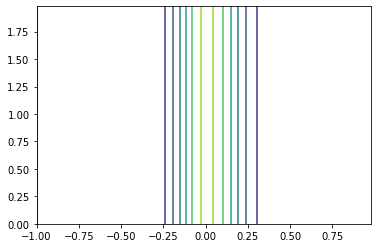

In [138]:
# Main code
q_mu = np.zeros(len(x_axis))
for i in range(len(x_axis)):
    q_mu[i] = stats.norm(mu_N, variance_N).pdf(x_axis[i])
q_tau = np.zeros(len(y_axis))
for i in range(len(y_axis)):
    q_tau = stats.gamma.pdf(y_axis, a_N, scale=1/b_N)
q_mu = q_mu.reshape(len(q_mu),1)
q_tau = q_tau.reshape(1,len(q_tau))
q_mu_tau = np.dot(q_mu, q_tau)
plt.contour(x_axis, y_axis, q_mu_tau)
plt.show()
